In [64]:
#2/2/24: Aww yeah, Steve gave us some excellent data.Let's finally exploe it!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv('../first_data.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.shape

(176, 19)

In [16]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['year', 'periodname', 'cpi', 'cpi_yoy', 'unemployment', 'nf_employment',
       'nf_employment_yoy', 'ulc', 'ulc_yoy', 'hourly_earnings',
       'hourly_earnings_yoy', 'ppi', 'ppi_yoy', 'shelter', 'shelter_yoy',
       'energy', 'energy_yoy', 'food', 'food_yoy'],
      dtype='object')

In [17]:
df.head()

,year,periodname,cpi,cpi_yoy,unemployment,nf_employment,nf_employment_yoy,ulc,ulc_yoy,hourly_earnings,hourly_earnings_yoy,ppi,ppi_yoy,shelter,shelter_yoy,energy,energy_yoy,food,food_yoy
0,2023,December,306.746,3.352123,3.7,157232.0,1.745236,NaN,NaN,34.27,4.100851,141.154,0.982973,390.037,6.174409,269.375,-2.023009,325.409,2.704844
1,2023,November,307.051,3.137271,3.7,157016.0,1.762845,NaN,NaN,34.12,4.024390,141.877,0.775651,388.266,6.526010,277.029,-5.435684,325.172,2.949119
2,2023,October,307.671,3.241145,3.8,156843.0,1.842136,NaN,NaN,34.00,4.102878,142.448,1.213585,386.536,6.730727,286.754,-4.529580,325.731,3.300742
3,2023,September,307.789,3.699698,3.8,156738.0,1.988522,NaN,NaN,33.91,4.242238,142.898,2.021904,385.259,7.145857,296.004,-0.450322,324.704,3.692255
4,2023,August,307.026,3.665112,3.8,156476.0,2.050453,NaN,NaN,33.82,4.286155,142.641,1.911907,382.782,7.248886,294.328,-3.616573,324.100,4.254121


In [43]:
df.isnull().sum() #Any multiple of 44 is likely via quarterly things that weren't relevant/didn't for whatever reason sum
#up those guys.

year                     0
periodname               0
cpi                     44
cpi_yoy                 56
unemployment            44
nf_employment           44
nf_employment_yoy       56
ulc                    132
ulc_yoy                144
hourly_earnings         44
hourly_earnings_yoy     56
ppi                     44
ppi_yoy                 56
shelter                 44
shelter_yoy             56
energy                  44
energy_yoy              56
food                    44
food_yoy                56
dtype: int64

In [ ]:
def outlier_gauger(df, col_name, thrs):
    

In [40]:
#We'll start with each feature/whatever:
target = -1

target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}")
#insert line about outliers? Well, could potentially add to the table if relevant.... hmm guess we'll see
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis

#Anyways, bottom line interesting how each year is exactly 16... guess this was what Aaran was talking about iwth quarterly
#and monthly division, see below.

year is a int64
count     176.0000
mean     2018.0000
std         3.1713
min      2013.0000
25%      2015.0000
50%      2018.0000
75%      2021.0000
max      2023.0000
Name: year, dtype: float64


,year,count,proportion
0,2023,16,0.091
1,2022,16,0.091
2,2021,16,0.091
3,2020,16,0.091
4,2019,16,0.091
5,2018,16,0.091
6,2017,16,0.091
7,2016,16,0.091
8,2015,16,0.091
9,2014,16,0.091


In [41]:
df[df['year'] == 2023]

,year,periodname,cpi,cpi_yoy,unemployment,nf_employment,nf_employment_yoy,ulc,ulc_yoy,hourly_earnings,hourly_earnings_yoy,ppi,ppi_yoy,shelter,shelter_yoy,energy,energy_yoy,food,food_yoy
0,2023,December,306.746,3.352123,3.7,157232.0,1.745236,NaN,NaN,34.27,4.100851,141.154,0.982973,390.037,6.174409,269.375,-2.023009,325.409,2.704844
1,2023,November,307.051,3.137271,3.7,157016.0,1.762845,NaN,NaN,34.12,4.024390,141.877,0.775651,388.266,6.526010,277.029,-5.435684,325.172,2.949119
2,2023,October,307.671,3.241145,3.8,156843.0,1.842136,NaN,NaN,34.00,4.102878,142.448,1.213585,386.536,6.730727,286.754,-4.529580,325.731,3.300742
3,2023,September,307.789,3.699698,3.8,156738.0,1.988522,NaN,NaN,33.91,4.242238,142.898,2.021904,385.259,7.145857,296.004,-0.450322,324.704,3.692255
4,2023,August,307.026,3.665112,3.8,156476.0,2.050453,NaN,NaN,33.82,4.286155,142.641,1.911907,382.782,7.248886,294.328,-3.616573,324.100,4.254121
5,2023,July,305.691,3.177780,3.5,156311.0,2.177409,NaN,NaN,33.73,4.330343,141.871,1.131277,381.681,7.658308,284.828,-12.470230,323.523,4.858815
6,2023,June,305.109,2.969178,3.6,156075.0,2.403354,NaN,NaN,33.60,4.412679,141.181,0.257068,380.006,7.798839,283.854,-16.738092,322.556,5.741851
7,2023,May,304.127,4.047609,3.7,155970.0,2.583497,NaN,NaN,33.45,4.335621,140.912,1.070873,378.622,8.026785,279.816,-11.663368,322.249,6.691542
8,2023,April,303.363,4.930320,3.4,155689.0,2.644418,NaN,NaN,33.34,4.383219,141.303,2.260836,376.528,8.095818,283.352,-5.064848,321.566,7.651208
9,2023,March,301.836,4.984974,3.5,155472.0,2.673288,NaN,NaN,33.20,4.304116,140.995,2.660531,374.946,8.175182,279.084,-6.424898,320.863,8.499364


In [42]:
#Anyways,back to our principal focus:

target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis

#Will comment when I see something of interest.Won't bother to comment if eveyrthig is 'smooth'.

periodname is a object
count          176
unique          16
top       December
freq            11
Name: periodname, dtype: object


,periodname,count,proportion
0,December,11,0.062
1,November,11,0.062
2,October,11,0.062
3,September,11,0.062
4,August,11,0.062
5,July,11,0.062
6,June,11,0.062
7,May,11,0.062
8,April,11,0.062
9,March,11,0.062


In [44]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis

#Hmm, unsure of the values, but bottom line somehwat normally distributed seemingly; noooooo so much more on the right...
#and even per the mean/median: slightly skewed to the left,but thot right-end upper tail...

cpi is a float64
count    132.000000
mean     256.885333
std       22.823229
min      230.280000
25%      238.106750
50%      251.650000
75%      265.421250
max      307.789000
Name: cpi, dtype: float64


,cpi,count,proportion
0,306.746,1,0.008
1,242.839,1,0.008
2,237.336,1,0.008
3,236.525,1,0.008
4,236.916,1,0.008
...,...,...,...
127,260.388,1,0.008
128,260.229,1,0.008
129,260.474,1,0.008
130,261.582,1,0.008


In [45]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis

#Unsure if this is like from last years or the previous month,but regardless...

cpi_yoy is a float64
count    120.000000
mean       2.746350
std        2.320770
min       -0.199517
25%        1.368995
50%        2.018784
75%        3.193621
max        9.059758
Name: cpi_yoy, dtype: float64


,cpi_yoy,count,proportion
0,3.352123,1,0.008
1,3.137271,1,0.008
2,1.062875,1,0.008
3,1.463784,1,0.008
4,1.635988,1,0.008
...,...,...,...
115,1.399770,1,0.008
116,1.676215,1,0.008
117,2.619763,1,0.008
118,4.159695,1,0.008


In [46]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis
#Another skew to the left.

unemployment is a float64
count    132.000000
mean       5.117424
std        1.836754
min        3.400000
25%        3.800000
50%        4.700000
75%        5.950000
max       14.800000
Name: unemployment, dtype: float64


,unemployment,count,proportion
0,3.6,15,0.114
1,3.8,11,0.083
2,3.7,7,0.053
3,3.5,7,0.053
4,4.0,6,0.045
5,6.7,5,0.038
6,5.0,5,0.038
7,4.4,5,0.038
8,4.7,4,0.030
9,5.1,4,0.030


In [47]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

nf_employment is a float64
count       132.000000
mean     145913.068182
std        6151.984114
min      130430.000000
25%      141455.500000
50%      146073.500000
75%      150671.750000
max      157232.000000
Name: nf_employment, dtype: float64


,nf_employment,count,proportion
0,157232.0,1,0.008
1,145639.0,1,0.008
2,142810.0,1,0.008
3,143083.0,1,0.008
4,143198.0,1,0.008
5,143410.0,1,0.008
6,143666.0,1,0.008
7,143856.0,1,0.008
8,143901.0,1,0.008
9,144152.0,1,0.008


In [48]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

nf_employment_yoy is a float64, the 6 position column in our dataframe.
count    120.000000
mean       1.425216
std        3.400509
min      -13.371811
25%        1.514774
50%        1.754041
75%        2.183910
max       10.874799
Name: nf_employment_yoy, dtype: float64


,nf_employment_yoy,count,proportion
0,1.745236,1,0.008
1,1.762845,1,0.008
2,1.782875,1,0.008
3,1.895055,1,0.008
4,1.742119,1,0.008
5,1.665850,1,0.008
6,1.624931,1,0.008
7,1.704633,1,0.008
8,1.697929,1,0.008
9,1.607200,1,0.008


In [49]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]
#Hmm, now this is particuparly interesting to me - ulc.Especially when wehave at least half of whom negative [which I thought]
#wouldnt' be possible given it's a fraction

ulc is a float64, the 7 position column in our dataframe.
count    44.000000
mean      2.140909
std       4.911369
min     -11.100000
25%      -0.850000
50%       1.950000
75%       4.325000
max      14.300000
Name: ulc, dtype: float64


,ulc,count,proportion
0,1.4,3,0.068
1,1.5,2,0.045
2,-2.0,2,0.045
3,3.1,2,0.045
4,3.6,2,0.045
5,1.3,1,0.023
6,3.0,1,0.023
7,2.5,1,0.023
8,1.8,1,0.023
9,-0.4,1,0.023


In [50]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10] #Wow, what a proportion

ulc_yoy is a float64, the 8 position column in our dataframe.
count     32.000000
mean     -68.073591
std      283.851720
min     -892.857143
25%     -176.041667
50%      -58.306452
75%       47.285714
max      650.000000
Name: ulc_yoy, dtype: float64


,ulc_yoy,count,proportion
0,-96.503497,1,0.031
1,-90.090090,1,0.031
2,-65.000000,1,0.031
3,-87.096774,1,0.031
4,-325.000000,1,0.031
5,-70.491803,1,0.031
6,-145.454545,1,0.031
7,-216.666667,1,0.031
8,-51.612903,1,0.031
9,-26.666667,1,0.031


In [51]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(df[name].describe())
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]#Oh wow, about about eveningly distrbuted.... but odd - how is the min and max so hihg/low???

hourly_earnings is a float64, the 9 position column in our dataframe.
count    132.000000
mean      27.848636
std        3.118994
min       23.750000
25%       25.170000
50%       27.060000
75%       30.087500
max       34.270000
Name: hourly_earnings, dtype: float64


,hourly_earnings,count,proportion
0,30.05,2,0.015
1,26.49,2,0.015
2,31.63,2,0.015
3,25.38,2,0.015
4,24.97,2,0.015
5,29.92,2,0.015
6,25.19,1,0.008
7,25.25,1,0.008
8,25.24,1,0.008
9,25.77,1,0.008


In [53]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

hourly_earnings_yoy is a float64, the 10 position column in our dataframe.
count    120.000
mean       3.455
std        1.281
min        0.633
25%        2.458
50%        3.089
75%        4.398
max        8.105
Name: hourly_earnings_yoy, dtype: float64


,hourly_earnings_yoy,count,proportion
0,4.100851,1,0.008
1,4.024390,1,0.008
2,2.510961,1,0.008
3,2.628435,1,0.008
4,2.778881,1,0.008
5,2.574257,1,0.008
6,2.694136,1,0.008
7,2.442868,1,0.008
8,2.679275,1,0.008
9,2.593320,1,0.008


In [54]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]#A bit to the left,but wow... a std of just 11
#recall earlier with the cpi:The various pis were about double, but that includes the standard deviation....
#At least I find that very interesting

ppi is a float64, the 11 position column in our dataframe.
count    132.000
mean     119.383
std       11.093
min      108.300
25%      110.750
50%      116.600
75%      123.325
max      142.898
Name: ppi, dtype: float64


,ppi,count,proportion
0,110.8,6,0.045
1,109.7,5,0.038
2,111.6,3,0.023
3,111.0,3,0.023
4,116.6,3,0.023
5,118.4,3,0.023
6,118.5,3,0.023
7,109.4,3,0.023
8,109.8,3,0.023
9,109.5,3,0.023


In [55]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

ppi_yoy is a float64, the 12 position column in our dataframe.
count    120.000
mean       2.684
std        3.272
min       -1.519
25%        0.741
50%        1.904
75%        2.962
max       11.659
Name: ppi_yoy, dtype: float64


,ppi_yoy,count,proportion
0,0.000000,5,0.042
1,1.279707,2,0.017
2,1.917808,2,0.017
3,2.522523,1,0.008
4,1.731996,1,0.008
5,2.007299,1,0.008
6,2.187785,1,0.008
7,2.454545,1,0.008
8,2.268603,1,0.008
9,1.895307,1,0.008


In [56]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]
#Seemingly an average of some kind of house costs... odd.

shelter is a float64, the 13 position column in our dataframe.
count    132.000
mean     310.858
std       35.016
min      260.142
25%      281.256
50%      307.616
75%      330.413
max      390.037
Name: shelter, dtype: float64


,shelter,count,proportion
0,390.037,1,0.008
1,293.769,1,0.008
2,282.129,1,0.008
3,282.779,1,0.008
4,283.714,1,0.008
5,284.502,1,0.008
6,285.122,1,0.008
7,285.853,1,0.008
8,286.855,1,0.008
9,287.819,1,0.008


In [57]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

shelter_yoy is a float64, the 14 position column in our dataframe.
count    120.000
mean       3.775
std        1.603
min        1.453
25%        2.983
50%        3.276
75%        3.531
max        8.175
Name: shelter_yoy, dtype: float64


,shelter_yoy,count,proportion
0,6.174409,1,0.008
1,6.526010,1,0.008
2,3.374524,1,0.008
3,3.430969,1,0.008
4,3.535172,1,0.008
5,3.579214,1,0.008
6,3.637823,1,0.008
7,3.544062,1,0.008
8,3.529325,1,0.008
9,3.468691,1,0.008


In [58]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

energy is a float64, the 15 position column in our dataframe.
count    132.000
mean     230.638
std       35.623
min      172.061
25%      202.694
50%      221.608
75%      251.056
max      340.917
Name: energy, dtype: float64


,energy,count,proportion
0,269.375,1,0.008
1,199.608,1,0.008
2,189.267,1,0.008
3,183.378,1,0.008
4,180.171,1,0.008
5,172.061,1,0.008
6,179.017,1,0.008
7,185.652,1,0.008
8,192.673,1,0.008
9,200.035,1,0.008


In [59]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

energy_yoy is a float64, the 16 position column in our dataframe.
count    120.000
mean       2.410
std       14.082
min      -19.592
25%       -7.982
50%        0.384
75%        9.304
max       41.624
Name: energy_yoy, dtype: float64


,energy_yoy,count,proportion
0,-2.023009,1,0.008
1,-5.435684,1,0.008
2,-9.249325,1,0.008
3,-2.870944,1,0.008
4,0.146529,1,0.008
5,1.128036,1,0.008
6,5.413954,1,0.008
7,10.788085,1,0.008
8,15.188799,1,0.008
9,10.937509,1,0.008


In [60]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

food is a float64, the 17 position column in our dataframe.
count    132.000
mean     264.563
std       26.345
min      236.301
25%      247.470
50%      253.488
75%      272.132
max      325.731
Name: food, dtype: float64


,food,count,proportion
0,246.680,2,0.015
1,325.409,1,0.008
2,248.242,1,0.008
3,247.903,1,0.008
4,248.631,1,0.008
5,248.800,1,0.008
6,247.978,1,0.008
7,248.413,1,0.008
8,247.860,1,0.008
9,247.482,1,0.008


In [61]:
target += 1
name = df.columns[target]
print(f"{name} is a {df.dtypes[target]}, the {target} position column in our dataframe.")
print(round(df[name].describe(), 3))
curr_col_analysis = df[name].value_counts().reset_index()
curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
curr_col_analysis[:10]

food_yoy is a float64, the 18 position column in our dataframe.
count    120.000
mean       3.182
std        2.953
min       -0.393
25%        1.389
50%        1.981
75%        3.926
max       11.371
Name: food_yoy, dtype: float64


,food_yoy,count,proportion
0,2.704844,1,0.008
1,2.949119,1,0.008
2,0.019381,1,0.008
3,-0.287574,1,0.008
4,-0.393091,1,0.008
5,-0.350777,1,0.008
6,-0.237996,1,0.008
7,-0.156457,1,0.008
8,-0.003617,1,0.008
9,0.478671,1,0.008


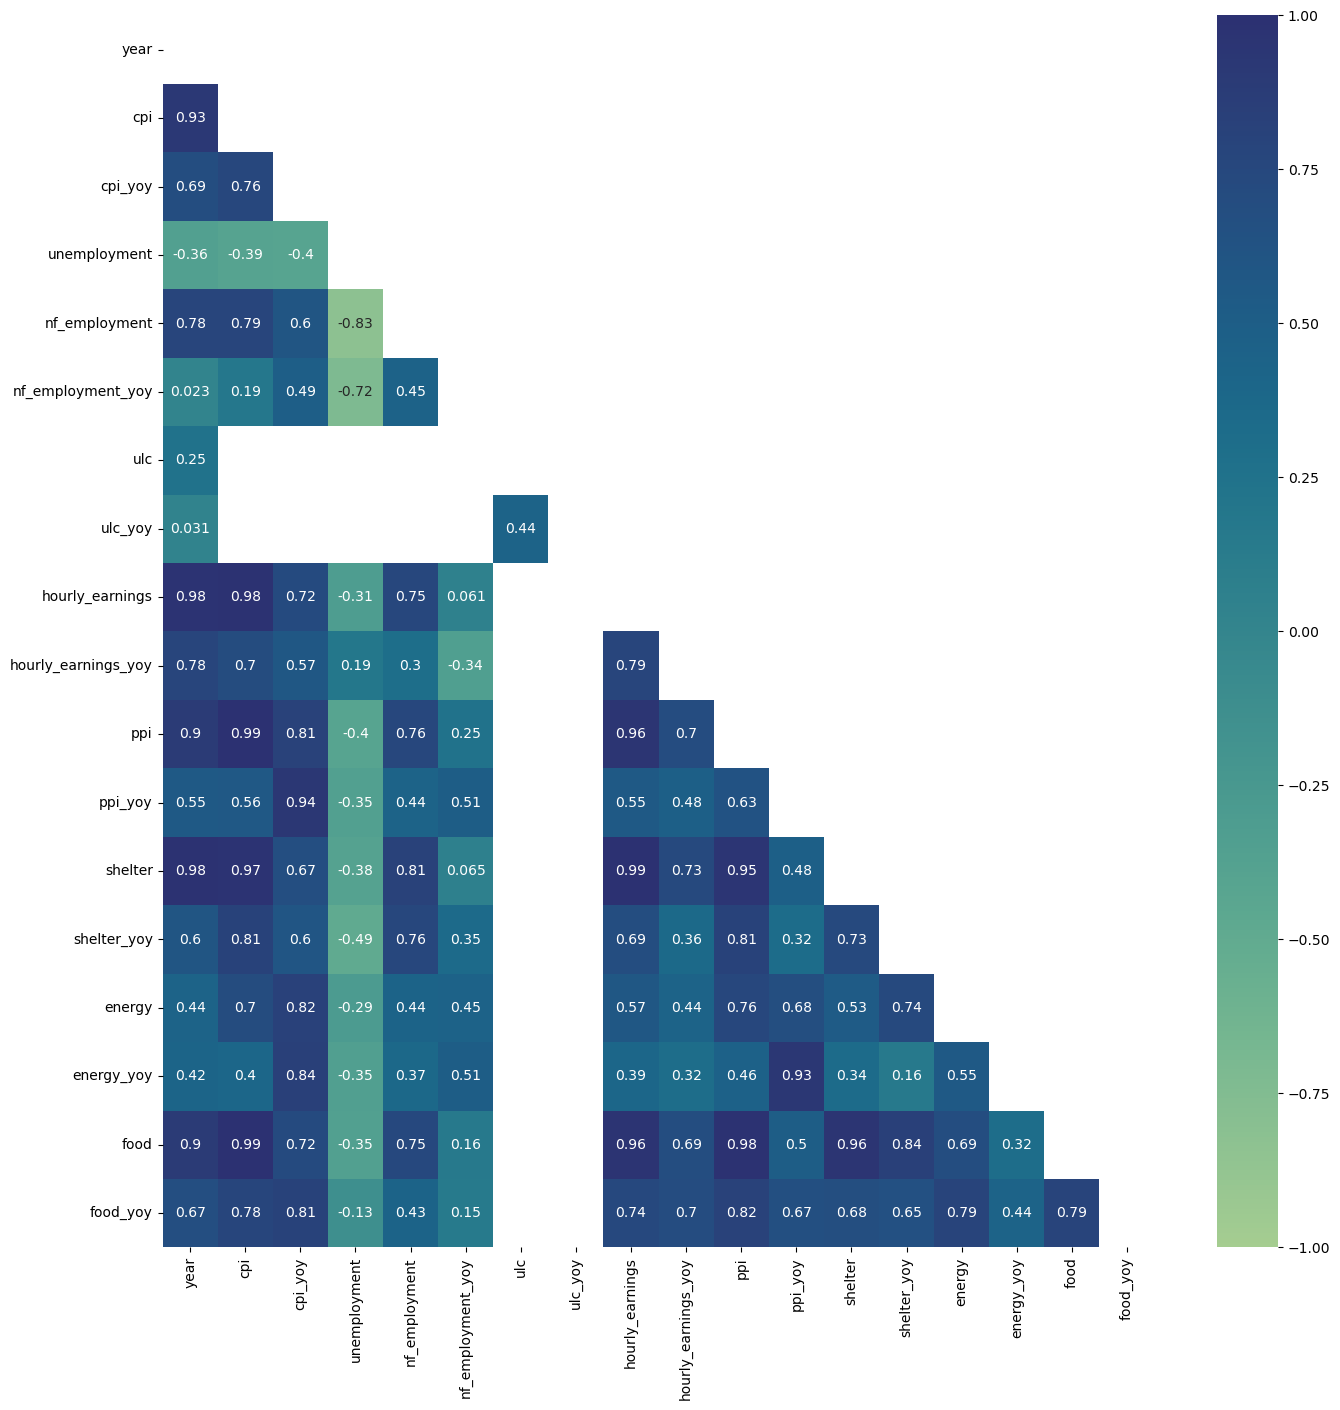

In [69]:
#Hmm,that's a nice start. Let's end with correlation for now:
plt.figure(figsize=(16, 16));
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True, vmin = -1, vmax = 1, cmap='crest');

In [ ]:
#We'll start with year: quite strongly correlated with food, sheleter, ppi, hourly earnings and cpi

#nteresting how energy  is pretty weak. ulic even weaker. and unemployement is actually somwhat negatively.

#On the supervised ends, focusing on bros of interest: greater, abs, than .8; and within .2:
#Hourly eearnings is almost soooo tied to cpi..... and so to with ppi.... and food.... fod being the most - dcenwt iwth the rest
#oh and shelter.... energy is still the same more or less... 

#Nf unemployement .8 and with unemployment...

#so too, unexpectantly by now, hourly earnings with shelter, ppi, ppi and shelter, ppi and food.... ie all these guys

#So, we see this cluster of: cpi, ppi, hourly wages, food, and shelter, and of course year.

#Unemployment remains interesting...knda makes since as everybody needs to get so if it increases people gotta dop
#their prices...

#And, re. energy - somehwat affected, but a lot more consistent...

In [ ]:
# for i in range(len(df[cname].value_counts())):
#     print(f"{cname}'s {df[cname].sort_values().unique()[i]} has a mean of {df[df[cname] == df[cname].sort_values().unique()[i]]['SalePrice'].mean()} and a count of {df[df[cname] == df[cname].sort_values().unique()[i]]['SalePrice'].count()}.")